In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("iris_data.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# Traducimos los nombres de las columnas del dataset para mostrarlo en español
df = df.rename(columns={'sepal_length': 'longitud_sepalo', 'sepal_width': 'ancho_sepalo', 'petal_length': 'longitud_petalo', 'petal_width': 'ancho_petalo',})

In [5]:
# Número de filas o forma
print(df.shape[0])

# Nombres de las columnas del dataset
print(df.columns.tolist())

# Tipos de columnas del dataset
print(df.dtypes)

150
['longitud_sepalo', 'ancho_sepalo', 'longitud_petalo', 'ancho_petalo', 'species']
longitud_sepalo    float64
ancho_sepalo       float64
longitud_petalo    float64
ancho_petalo       float64
species             object
dtype: object


In [6]:
# Valores por especie
df.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

## REVISEMOS ALGUNAS ESTADISTICAS DESCRIPTIVAS

In [8]:
status_df = df.describe()
status_df.loc['range'] = status_df.loc['max'] - status_df.loc['min']
column_new = ['mean','25%','50%','75%','max','range']
status_df = status_df.loc[column_new]

status_df

,longitud_sepalo,ancho_sepalo,longitud_petalo,ancho_petalo
mean,5.843333,3.054,3.758667,1.198667
25%,5.100000,2.800,1.600000,0.300000
50%,5.800000,3.000,4.350000,1.300000
75%,6.400000,3.300,5.100000,1.800000
max,7.900000,4.400,6.900000,2.500000
range,3.600000,2.400,5.900000,2.400000


In [9]:
# Agrupamos por especie y calculamos la media
df.groupby('species').mean()

,longitud_sepalo,ancho_sepalo,longitud_petalo,ancho_petalo
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [10]:
# Ahora calculamos la mediana
df.groupby('species').median()

,longitud_sepalo,ancho_sepalo,longitud_petalo,ancho_petalo
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [11]:
# Los visualizamos juntos
df.groupby('species').agg(['mean','median'])

longitud_sepalo        ancho_sepalo        longitud_petalo         \
                      mean median         mean median            mean median   
species                                                                        
setosa               5.006    5.0        3.418    3.4           1.464   1.50   
versicolor           5.936    5.9        2.770    2.8           4.260   4.35   
virginica            6.588    6.5        2.974    3.0           5.552   5.55   

           ancho_petalo         
                   mean median  
species                         
setosa            0.244    0.2  
versicolor        1.326    1.3  
virginica         2.026    2.0

## VISUALIZAMOS DATOS

In [13]:
# Configuración global para todos los gráficos
plt.rcParams['figure.figsize'] = [10, 6]  # Tamaño de las figuras (ancho, alto)
plt.rcParams['lines.color'] = 'blue'  # Color de las líneas
plt.rcParams['axes.grid'] = True  # Activar la cuadrícula por defecto
plt.rcParams['grid.color'] = 'gray'  # Color de la cuadrícula
plt.rcParams['grid.linestyle'] = '-'  # Estilo de línea de la cuadrícula
plt.rcParams['grid.linewidth'] = 0.5  # Ancho de línea de la cuadrícula

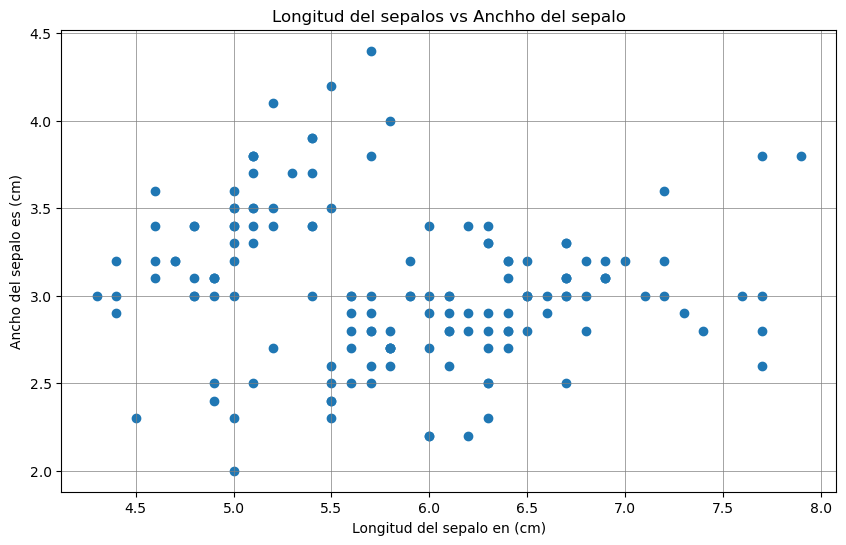

In [14]:
# 'longitud_sepalo', 'ancho_sepalo', 'longitud_petalo', 'ancho_petalo', 'species'
%matplotlib inline
ax = plt.axes()
ax.scatter(df.longitud_sepalo , df.ancho_sepalo)
ax.set(xlabel='Longitud del sepalo en (cm)' , ylabel='Ancho del sepalo es (cm)' , title='Longitud del sepalos vs Anchho del sepalo');

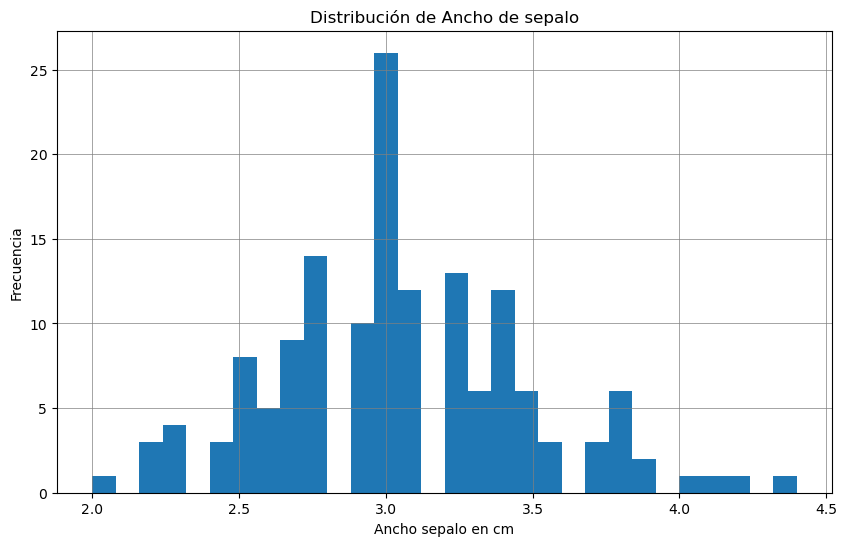

In [15]:
# Ahora presentemos un histograma para (ancho sepalo , longitud sepalo , ancho petalo , longitud petalo)
# 'longitud_sepalo', 'ancho_sepalo', 'longitud_petalo', 'ancho_petalo'
sepal_w=plt.axes()
sepal_w.hist(df.ancho_sepalo , bins = 30)
sepal_w.set(xlabel='Ancho sepalo en cm', ylabel='Frecuencia',title='Distribución de Ancho de sepalo')
plt.show()

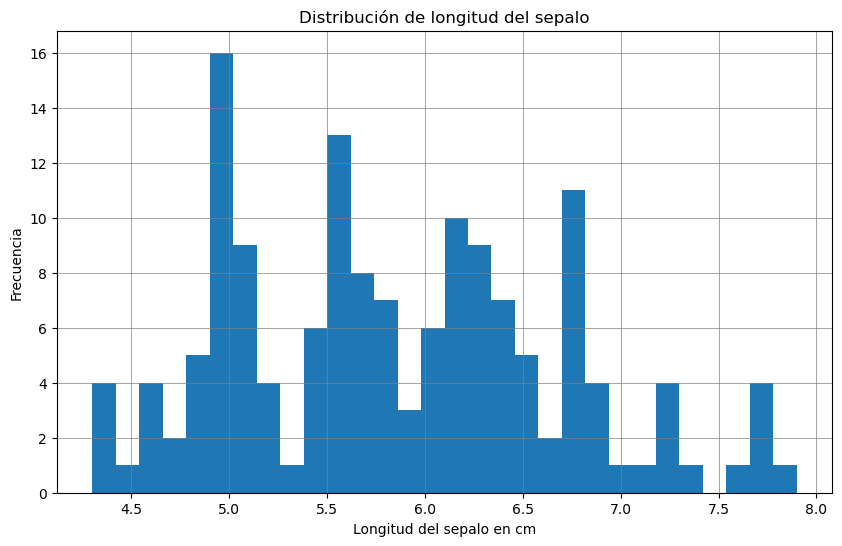

In [16]:
# 'longitud_sepalo', 'ancho_sepalo', 'longitud_petalo', 'ancho_petalo'
sepal_l=plt.axes()
sepal_l.hist(df.longitud_sepalo , bins = 30)
sepal_l.set(xlabel='Longitud del sepalo en cm', ylabel='Frecuencia',title='Distribución de longitud del sepalo')
plt.show()

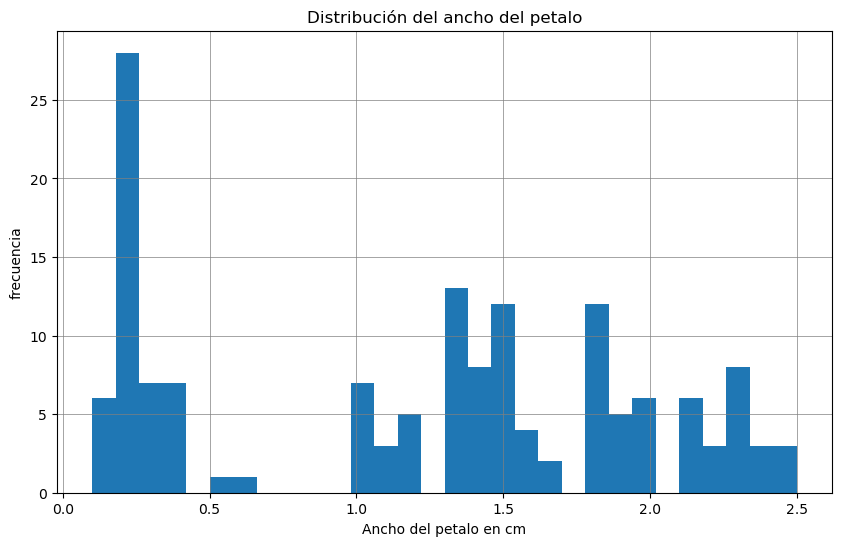

In [17]:
# 'longitud_sepalo', 'ancho_sepalo', 'longitud_petalo', 'ancho_petalo'
petal_w=plt.axes()
petal_w.hist(df.ancho_petalo , bins = 30)
petal_w.set(xlabel='Ancho del petalo en cm', ylabel='frecuencia',title='Distribución del ancho del petalo')
plt.show()

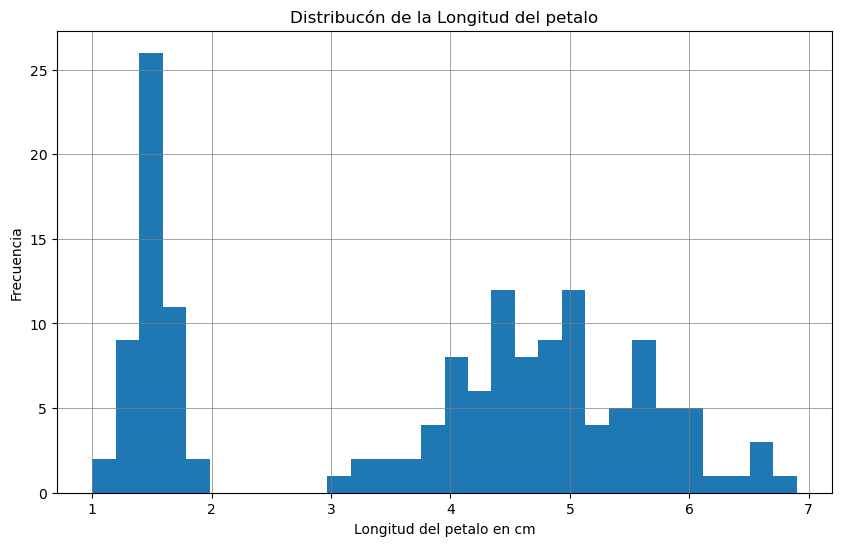

In [18]:
# 'longitud_sepalo', 'ancho_sepalo', 'longitud_petalo', 'ancho_petalo'
petal_l=plt.axes()
petal_l.hist(df.longitud_petalo , bins = 30)
petal_l.set(xlabel='Longitud del petalo en cm', ylabel='Frecuencia',title='Distribucón de la Longitud del petalo')
plt.show()

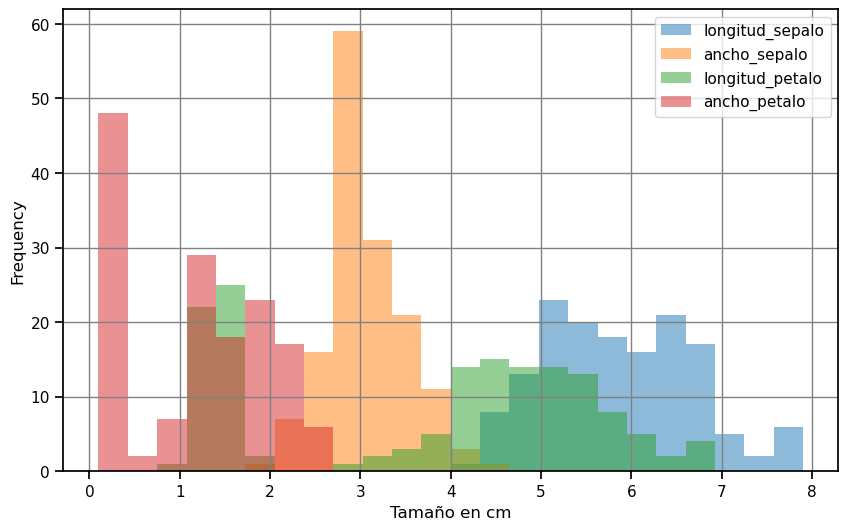

In [19]:
# Grafico únic para todas las características!
sns.set_context('notebook')
ax=df.plot.hist(bins=24 , alpha = 0.5)
ax.set_xlabel('Tamaño en cm');

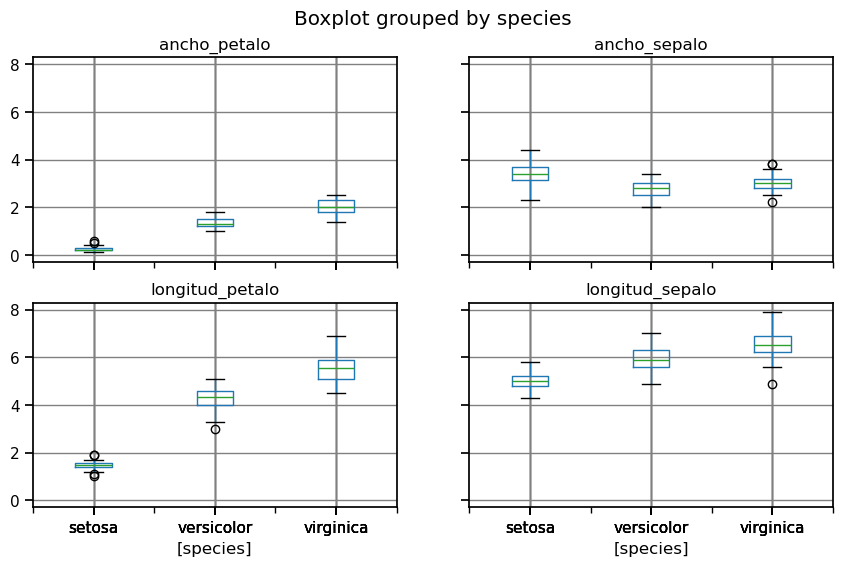

In [20]:
# Boxplot
df.boxplot(by='species')
plt.show()

In [21]:
plot_data = (df 
            .set_index('species')
            .stack()
            .to_frame()
            .reset_index()
            .rename(columns={0:'size', 'level_1':'measurement'}))
plot_data.head()

,species,measurement,size
0,setosa,longitud_sepalo,5.1
1,setosa,ancho_sepalo,3.5
2,setosa,longitud_petalo,1.4
3,setosa,ancho_petalo,0.2
4,setosa,longitud_sepalo,4.9


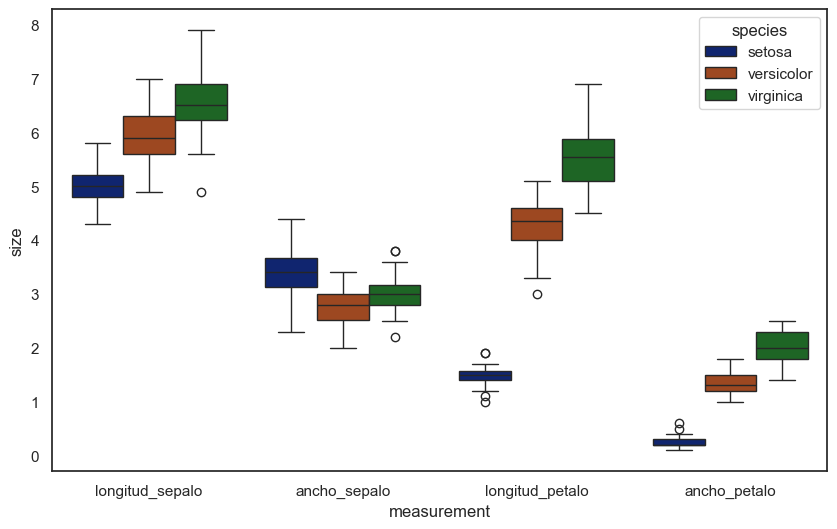

In [47]:
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

f = plt.figure(figsize=(10,6))
sns.boxplot(x='measurement', y='size', 
            hue='species', data=plot_data);

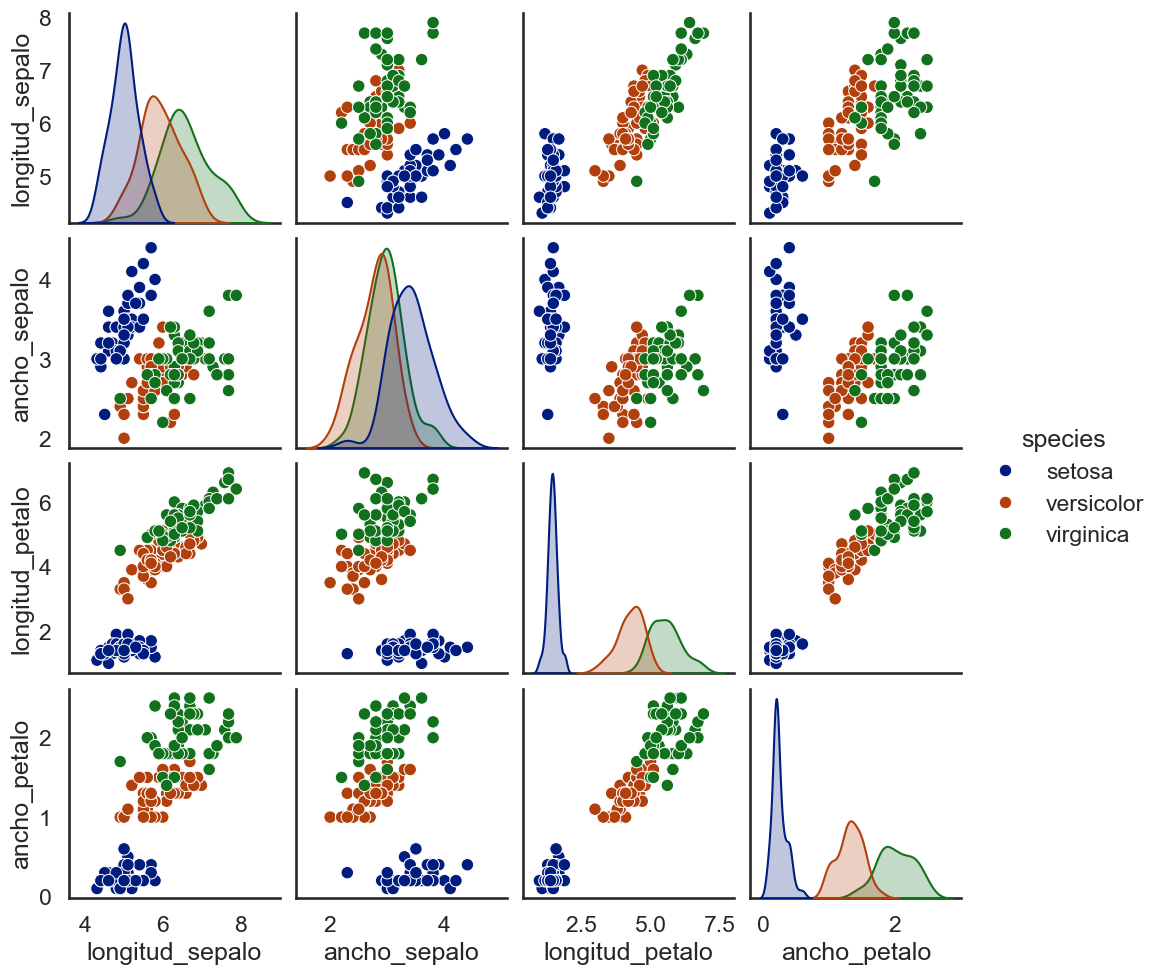

In [23]:
sns.set_context('talk')
sns.pairplot(df, hue='species');

---
---

### ESTE EJERCICIO SIRVE DE PRACTICA PARA UNA EXPLORACIÓN DE DATOS TIPO EDA
---
---